In [1]:
import pandas as pd # data processing
import numpy as np # perform arithmetic operations
import matplotlib.pyplot as plt # for data visualisation
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
%matplotlib inline

#Showing a preview of the dataset
redwine = pd.read_csv("RED WINE QUALITY DATASET.csv")
redwine.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [2]:
#Description of Red Wine Quality Dataset
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,7.597487,0.571759,0.215779,2.369347,0.099085,15.628141,60.678392,0.996634,3.333668,0.680553,9.838693,5.266332
std,1.015060,0.174223,0.182232,1.220362,0.072629,9.414282,38.135154,0.001173,0.158293,0.267490,0.834702,0.614983
min,4.600000,0.220000,0.000000,1.200000,0.045000,3.000000,8.000000,0.991600,2.740000,0.330000,9.000000,4.000000
25%,7.100000,0.450000,0.070000,1.800000,0.073500,9.000000,29.500000,0.996200,3.230000,0.540000,9.400000,5.000000
50%,7.700000,0.560000,0.180000,2.000000,0.081000,14.000000,52.000000,0.996800,3.340000,0.590000,9.500000,5.000000
75%,8.100000,0.660000,0.310000,2.300000,0.092000,19.500000,89.000000,0.997200,3.420000,0.720000,10.100000,6.000000
max,11.500000,1.330000,1.000000,10.700000,0.610000,52.000000,153.000000,0.999600,3.900000,2.000000,14.000000,7.000000


In [3]:
#check for missing value in dataset
redwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
   pH                   0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
#Load info of wine quality dataset
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         199 non-null    float64
 1   volatile acidity      199 non-null    float64
 2   citric acid           199 non-null    float64
 3   residual sugar        199 non-null    float64
 4   chlorides             199 non-null    float64
 5   free sulfur dioxide   199 non-null    int64  
 6   total sulfur dioxide  199 non-null    int64  
 7   density               199 non-null    float64
 8      pH                 199 non-null    float64
 9   sulphates             199 non-null    float64
 10  alcohol               199 non-null    float64
 11  quality               199 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 18.8 KB


In [5]:
#modify column names
redwine.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide','density','pH','sulphates', 'alcohol', 'quality' ]
redwine.head(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [6]:
redwine['quality'].unique()

array([5, 6, 7, 4], dtype=int64)

In [7]:
#Check how data is distributed among the unique values
redwine.quality.value_counts().sort_index()

4     11
5    131
6     50
7      7
Name: quality, dtype: int64

In [33]:
conditions = [
    (redwine['quality'] >= 7),
    (redwine['quality'] <= 4)
]
rating = ['good', 'bad']
redwine['rating'] = np.select(conditions, rating, default='average')
redwine.rating.value_counts()


average    181
bad         11
good         7
Name: rating, dtype: int64

In [34]:
#Check correlation between independent variables and quality
correlation = redwine.corr()['quality'].sort_values(ascending=False)
print(correlation)

quality                 1.000000
alcohol                 0.245470
pH                      0.092119
fixed_acidity           0.044767
sulphates              -0.000899
citric_acid            -0.047602
free_sulfur_dioxide    -0.052594
residual_sugar         -0.061746
density                -0.106307
chlorides              -0.124554
total_sulfur_dioxide   -0.169687
volatile_acidity       -0.237017
Name: quality, dtype: float64


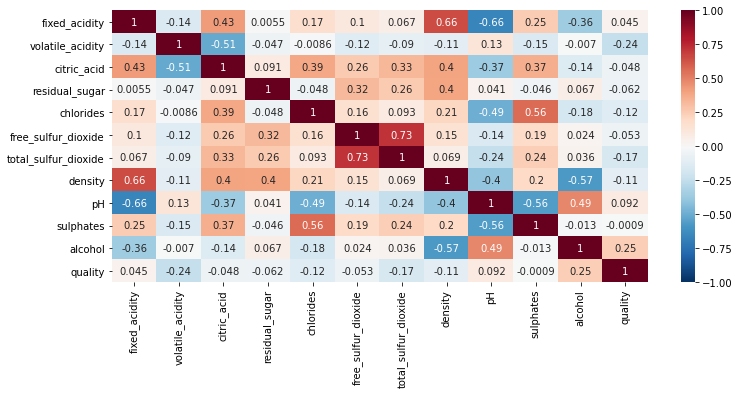

In [9]:
#This is to show numerical correlation of between independent variables and quality
import seaborn as sns
correlation = redwine.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [27]:
# Multiple Linear Regression
import numpy as np 
import matplotlib.pyplot as plt # for data visualisation
from mpl_toolkits.mplot3d import Axes3D 
import pdb
#Since we found that alcohol and pH have highest correlation amongst other IVs, we will use these independent variables 
def MLRegress(Alcohol,Ph,Quality):
    Z = np.ones(Alcohol.shape) # join two vectors
    Z = np.vstack((Z, Alcohol)) # by vertical stacking
    Z = np.vstack((Z, ph)) # by vertical stacking
    Z = Z.T # array of numberdatapoints x # variables
    b,resid,rank,sgl = np.linalg.lstsq(Z,Quality,rcond=None)
    return b
def MLRegressOLS(Alcohol,Ph,Quality):
    Z = np.ones(Alcohol.shape) # join two vectors
    Z = np.vstack((Z, Alcohol)) # by vertical stacking
    Z = np.vstack((Z, ph)) # by vertical stacking
    Z = Z.T # array of numberdatapoints x # variables
    b,resid,rank,sgl = np.linalg.lstsq(Z,Quality,rcond=None)
    est = sm.OLS(Quality, Z)
    est2 = est.fit()
    print(est2.summary())
    return b 
def plot3Dstem(Alcohol,Ph,Quality,b,ax):
# for a 3D plot of a plane, we want to see sample data points that are
# above or below the plane, in the z (vertical) axis
    xs = Alcohol; ys = Ph; zs = Quality
    for i in range(len(xs)):
    # check if computed z is < actual value
        zsb = b[0] + b[1]*xs[i] + b[2]*ys[i]
# use differing colours to indicate if actual z value is above computed
        if zsb < zs[i]:
           markertype = '^'; colr = 'b' # computed is below
        else:
            markertype = 'v'; colr = 'g'
# special 3D stem plot
        ax.plot([xs[i], xs[i]], [ys[i], ys[i]], [0, zs[i]], ':', linewidth=2, color=colr, alpha=.5)
# plot up arrow for Quality above actual else down arrow
        ax.plot([xs[i]], [ys[i]], [zs[i]], markertype, markersize=8,
          markerfacecolor='none', color= colr,label='ib')
    return # nothing to return!

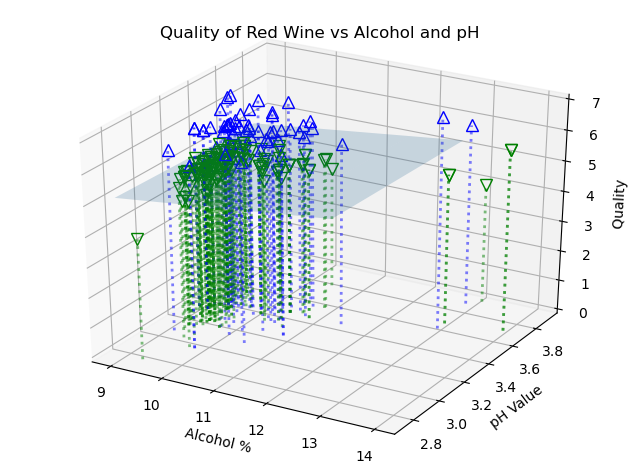

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     6.391
Date:                Mon, 22 Jun 2020   Prob (F-statistic):            0.00205
Time:                        00:03:36   Log-Likelihood:                -178.84
No. Observations:                 199   AIC:                             363.7
Df Residuals:                     196   BIC:                             373.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8223      0.901      4.244      0.0

array([ 3.82227143,  0.19358628, -0.13815886])

In [35]:
# Main program
al=redwine['alcohol'].to_numpy(np.float64)
Alcohol = np.array(al)
qa=redwine['quality'].to_numpy(np.int64)
Quality = np.array(qa)
phv=redwine['pH'].to_numpy(np.float64)
Ph = np.array(phv)
# compute
b = MLRegress(Alcohol,Ph,Quality)
# prepare output - set the basic plot first
fig = plt.figure(figsize=(8,6), dpi=100) # 800 x 600 pixels
ax = fig.add_subplot(111, projection='3d') # recommended approach
plt.title('Quality of Red Wine vs Alcohol and pH');
ax.set_xlabel('Alcohol %')
ax.set_ylabel('pH Value')
ax.set_zlabel('Quality ')
# plot the stems
plot3Dstem(Alcohol,Ph,Quality,b,ax)
# Plot the plane
# Prepare the 3D plot
xmesh = np.arange(min(Alcohol),max(Alcohol)) # generate range of values
ymesh = np.arange(min(ph),max(ph),1)
xmesh, ymesh = np.meshgrid(xmesh, ymesh)
zmesh = (b[0] + b[1]*xmesh + b[2]*ymesh) # compute z values
ax.plot_surface(xmesh, ymesh, zmesh, alpha=0.2) # plot it
plt.savefig('MLR.svg')
plt.show()

#Summary of Independent variables using OLS model
b1 = MLRegressOLS(Alcohol,ph,Quality)
display(b1)

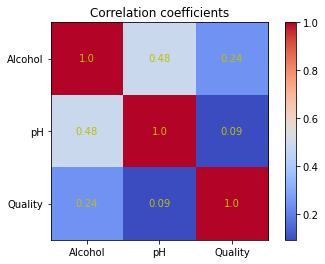

In [20]:
# correlation coeff
xyz = np.vstack((Alcohol,ph,Quality)) # vertical stack #variables X #samples
corrcoef = np.corrcoef(xyz)
fig, ax = plt.subplots()
im=ax.imshow(corrcoef, cmap='coolwarm')
ax.figure.colorbar(im)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('Alcohol', 'pH', 'Quality'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('Alcohol', 'pH', 'Quality'))
ax.set_title('Correlation coefficients')
ax.set_ylim(2.5, -0.5) # make sure the coloured squares fit into the boundary need to try!
for i in range(3):
    for j in range(3):
        ax.text(j, i, (int(corrcoef[i, j]*100))/100, ha='center', va='center', color='y')
plt.savefig('CorrCoef.svg')
plt.show()